In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor, plot_importance
from scipy import stats

In [2]:
###################################
#Name: 김승회
#Project Outline:
#Using four models for prediction: Linear Regression, Ridge, GBM, XGBoost
#Result: GBM -> XGBoost -> Ridge -> Linear Regression
#Limitation: Ridge and Linear are both linear regression while GBM and XGBoost are not. This means that for the best results,
#different data-preprocessing apporaches have to be done for each of them. 
###################################

In [3]:
#Import data which I initally downloaded as .data format so I changed to .txt and then opened it with .csv.
df = pd.read_csv('imported.csv',header=None)

In [4]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
          'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [5]:
#Added headings to the dataframe
df.columns = cols
data = df

In [6]:
#replaced ? value with NaN 
data[cols] = data[cols].replace({'?':np.nan})
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [7]:
#Dropped symboling feature
data = data.drop('symboling',axis=1)
data

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [8]:
#Deleteed all the rows where normalized-losses are null
data = data[data['normalized-losses'].notnull()]

In [9]:
data

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [10]:
#As can be seen, a lot of columns are object(strings). 
#To interpret more easily, I am going to change them into numeric type.
print(data.dtypes)

normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [11]:
data.iloc[3]

normalized-losses      158
make                  audi
fuel-type              gas
aspiration           turbo
num-of-doors          four
body-style           sedan
drive-wheels           fwd
engine-location      front
wheel-base           105.8
length               192.7
width                 71.4
height                55.9
curb-weight           3086
engine-type            ohc
num-of-cylinders      five
engine-size            131
fuel-system           mpfi
bore                  3.13
stroke                 3.4
compression-ratio      8.3
horsepower             140
peak-rpm              5500
city-mpg                17
highway-mpg             20
price                23875
Name: 8, dtype: object

In [12]:
#I made a function which takes in a list of column names and then encode each of the column with 0,1,2... => label encoding

import enum
#x = data['engine-type'].unique()
#x[0]
data_list = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type',
            'num-of-cylinders', 'fuel-system']
for x in data_list:
    lst = data[str(x)].unique()
    dictionary = {}
    for i, j in enumerate(lst):
        dictionary[str(j)] = i
    data[str(x)] = data[str(x)].map(dictionary)

data

C:\Users\edwardkim\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,164,0,0,0,0.0,0,0,0,99.8,176.6,...,109,0,3.19,3.4,10.0,102,5500,24,30,13950
4,164,0,0,0,0.0,0,1,0,99.4,176.6,...,136,0,3.19,3.4,8.0,115,5500,18,22,17450
6,158,0,0,0,0.0,0,0,0,105.8,192.7,...,136,0,3.19,3.4,8.5,110,5500,19,25,17710
8,158,0,0,1,0.0,0,0,0,105.8,192.7,...,131,0,3.13,3.4,8.3,140,5500,17,20,23875
10,192,1,0,0,1.0,0,2,0,101.2,176.8,...,108,0,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,17,0,0,0.0,0,2,0,109.1,188.8,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845
201,95,17,0,1,0.0,0,2,0,109.1,188.8,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045
202,95,17,0,0,0.0,0,2,0,109.1,188.8,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485
203,95,17,1,1,0.0,0,2,0,109.1,188.8,...,145,5,3.01,3.4,23.0,106,4800,26,27,22470


In [13]:
#Also made a function which takes in a list and then convert data types into either float or int.
data_list = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
for i in data_list:
    if '.' in data[str(i)].unique()[0]:
        data[str(i)] = data[str(i)].astype('float32')
    else:
        data[str(i)] = data[str(i)].astype('int64')
data

C:\Users\edwardkim\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\edwardkim\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,164,0,0,0,0.0,0,0,0,99.8,176.6,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950
4,164,0,0,0,0.0,0,1,0,99.4,176.6,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450
6,158,0,0,0,0.0,0,0,0,105.8,192.7,...,136,0,3.19,3.40,8.5,110,5500,19,25,17710
8,158,0,0,1,0.0,0,0,0,105.8,192.7,...,131,0,3.13,3.40,8.3,140,5500,17,20,23875
10,192,1,0,0,1.0,0,2,0,101.2,176.8,...,108,0,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,17,0,0,0.0,0,2,0,109.1,188.8,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845
201,95,17,0,1,0.0,0,2,0,109.1,188.8,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045
202,95,17,0,0,0.0,0,2,0,109.1,188.8,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485
203,95,17,1,1,0.0,0,2,0,109.1,188.8,...,145,5,3.01,3.40,23.0,106,4800,26,27,22470


In [14]:
print(data.dtypes)

normalized-losses      int64
make                   int64
fuel-type              int64
aspiration             int64
num-of-doors         float64
body-style             int64
drive-wheels           int64
engine-location        int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int64
num-of-cylinders       int64
engine-size            int64
fuel-system            int64
bore                 float32
stroke               float32
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [15]:
#Checking correlation between normalized-losses and other variables
#Here, I used spearman correlation rather than pearson.
correlation = data.corr('spearman')
correlation.iloc[0].sort_values(ascending = False)

normalized-losses    1.000000
num-of-doors         0.415212
peak-rpm             0.298279
drive-wheels         0.262566
horsepower           0.238695
num-of-cylinders     0.235473
price                0.187942
width                0.114213
engine-type          0.103957
stroke               0.092518
curb-weight          0.085896
engine-size          0.081360
length               0.020539
aspiration          -0.001027
compression-ratio   -0.051242
bore                -0.063747
body-style          -0.082395
wheel-base          -0.107533
fuel-type           -0.122707
fuel-system         -0.151238
highway-mpg         -0.196705
city-mpg            -0.253458
make                -0.345430
height              -0.391902
engine-location           NaN
Name: normalized-losses, dtype: float64

In [16]:
#checking whether there is any null value
data.isnull().any()

normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [17]:
data.isnull().sum()

normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         1
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [18]:
#bore is a diameter of each cylinder in an engine
#stroke is a length of piston travel in a reciprocating (piston) engine.
data['bore'].unique()
data_missing = data[data['bore'].isnull()]
data_missing

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,150,6,0,0,1.0,1,2,0,95.3,169.0,...,70,4,NaN,NaN,9.4,101,6000,17,23,10945
56,150,6,0,0,1.0,1,2,0,95.3,169.0,...,70,4,NaN,NaN,9.4,101,6000,17,23,11845
57,150,6,0,0,1.0,1,2,0,95.3,169.0,...,70,4,NaN,NaN,9.4,101,6000,17,23,13645
58,150,6,0,0,1.0,1,2,0,95.3,169.0,...,80,0,NaN,NaN,9.4,135,6000,16,23,15645


count    160.000000
mean       3.298437
std        0.267348
min        2.540000
25%        3.050000
50%        3.270000
75%        3.550000
max        3.940000
Name: bore, dtype: float64

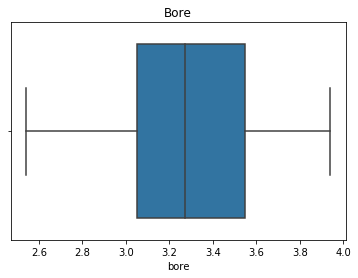

In [19]:
#When I plotted pie charts, I figured out that the values of bore and stroke are fairly distributed which makes hard to guess the 
#missing data. Here, I plotted boxplots for bore and stroke.
sns.boxplot(x=data["bore"])
plt.title('Bore')
data['bore'].describe(include='all')

count    160.000000
mean       3.237314
std        0.294210
min        2.070000
25%        3.107500
50%        3.270000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

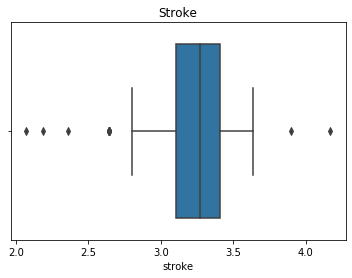

In [20]:
sns.boxplot(x=data["stroke"])
plt.title('Stroke')
data['stroke'].describe(include='all')

In [21]:
#Interquartile range for Stroke is fairly small and has some outliers.
#Hence, it is best to fill NaN with median.
#Bore does not have outliers, so I will use mean to fill out NaN.

data_missing1 = data[data['num-of-doors'].isnull()]
data_missing1

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,148,3,0,1,NaN,0,0,0,93.7,157.3,...,98,0,3.03,3.39,7.6,102,5500,24,30,8558


In [22]:
#pie chart to show the relation between a feature and body-style

x = data
def pie_chart(feature):
    zero = x[x['body-style'] == 0][feature].value_counts()
    one = x[x['body-style'] == 1][feature].value_counts()
    two = x[x['body-style'] == 2][feature].value_counts()
    three = x[x['body-style'] == 3][feature].value_counts()
    four = x[x['body-style'] == 4][feature].value_counts()
    feature_index = zero.index
    feature_index2 = one.index
    feature_index3 = two.index
    feature_index4 = three.index
    feature_index5 = four.index

    explode = (0,0.1)
    fig1, ax1 = plt.subplots()
    ax1.pie(zero, labels=feature_index,autopct='%1.1f%%')
    ax1.set_title(feature+'(0 is four, 1 is two)'+' sedan ratio')
    fig2, ax2 = plt.subplots()
    ax2.pie(one, labels= feature_index2,autopct='%1.1f%%')
    ax2.set_title(feature+'(0 is four, 1 is two)'+' hatchback ratio')
    fig3, ax3 = plt.subplots()
    ax3.pie(two, labels= feature_index3,autopct='%1.1f%%')
    ax3.set_title(feature+'(0 is four, 1 is two)'+' wagon ratio')
    fig4, ax4 = plt.subplots()
    ax4.pie(three, labels= feature_index4,autopct='%1.1f%%')
    ax4.set_title(feature+'(0 is four, 1 is two)'+' hardtop ratio')
    fig5, ax5 = plt.subplots()
    ax5.pie(four, labels= feature_index5,autopct='%1.1f%%')
    ax5.set_title(feature+'(0 is four, 1 is two)'+' convertible ratio')
    #plt.legend([ax1,ax2])
    plt.show()

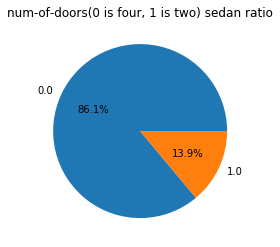

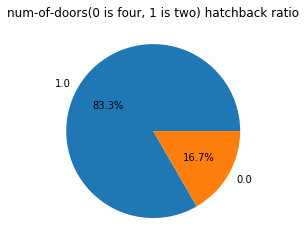

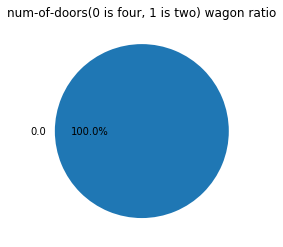

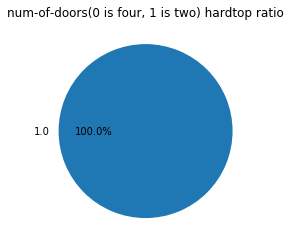

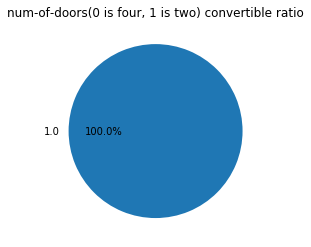

In [23]:
#'sedan', 'hatchback', 'wagon', 'hardtop', 'convertible' => 0,1,2,3,4
# showing the relation between num-of-doors and body-style

pie_chart('num-of-doors')

In [24]:
#The bar charts in the above show the clear distribution of num-of-doors against body-style.
#So, I filled the null values as below.
for i in range(len(x)):
    if np.isnan(x['num-of-doors'].iloc[i]):
        if x['body-style'].iloc[i] == 'sedan' or x['body-style'].iloc[i] == 'wagon':
            x['num-of-doors'].iloc[i] = 0  #4
        else:
            x['num-of-doors'].iloc[i] = 1  #2
x

C:\Users\edwardkim\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\edwardkim\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,164,0,0,0,0.0,0,0,0,99.8,176.6,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950
4,164,0,0,0,0.0,0,1,0,99.4,176.6,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450
6,158,0,0,0,0.0,0,0,0,105.8,192.7,...,136,0,3.19,3.40,8.5,110,5500,19,25,17710
8,158,0,0,1,0.0,0,0,0,105.8,192.7,...,131,0,3.13,3.40,8.3,140,5500,17,20,23875
10,192,1,0,0,1.0,0,2,0,101.2,176.8,...,108,0,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,17,0,0,0.0,0,2,0,109.1,188.8,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845
201,95,17,0,1,0.0,0,2,0,109.1,188.8,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045
202,95,17,0,0,0.0,0,2,0,109.1,188.8,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485
203,95,17,1,1,0.0,0,2,0,109.1,188.8,...,145,5,3.01,3.40,23.0,106,4800,26,27,22470


In [25]:
#correlation against normalized-losses
correlation = x.corr()
correlation
correlation.iloc[0].sort_values(ascending=False)

normalized-losses    1.000000
num-of-doors         0.410034
drive-wheels         0.318665
horsepower           0.295772
num-of-cylinders     0.269736
peak-rpm             0.264597
price                0.203254
engine-size          0.167365
curb-weight          0.119893
width                0.105073
stroke               0.065627
length               0.023220
engine-type          0.022537
aspiration          -0.007797
bore                -0.036167
body-style          -0.056131
wheel-base          -0.074362
fuel-system         -0.111744
fuel-type           -0.116736
compression-ratio   -0.132654
highway-mpg         -0.210768
city-mpg            -0.258502
make                -0.303962
height              -0.432335
engine-location           NaN
Name: normalized-losses, dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, GridSearchCV

In [27]:
#Target variable
y = x['normalized-losses']

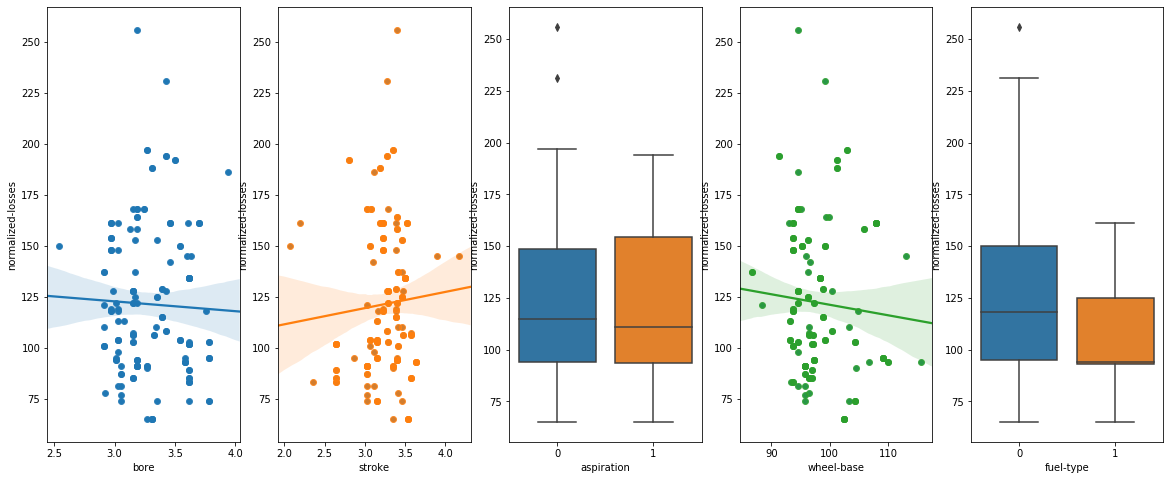

In [28]:
#Checking linearty against the target variable which is crucial for linear regression. However, I also used GBM and XGBoost so
#I did not drop many features as it will drop the performance of non-linear model.

fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(figsize = (20,8), ncols=5, nrows=1, sharey=False)

sns.scatterplot( x = x['bore'], y = y,  ax=ax1)
## Putting a regression line. 
sns.regplot(x = x['bore'], y = y, ax=ax1)

sns.scatterplot( x = x['stroke'], y = y,  ax=ax2)
## Putting a regression line. 
sns.regplot(x = x['stroke'], y = y, ax=ax2)

sns.boxplot( x = x['aspiration'], y = y,  ax=ax3)
## Putting a regression line. 
#sns.regplot(x = x['aspiration'], y = y, ax=ax3)

sns.scatterplot( x = x['wheel-base'], y = y,  ax=ax4)
## Putting a regression line. 
sns.regplot(x = x['wheel-base'], y = y, ax=ax4)

sns.boxplot( x = x['fuel-type'], y = y,  ax=ax5)
## Putting a regression line. 
#sns.regplot(x = x['fuel-type'], y = y, ax=ax5)

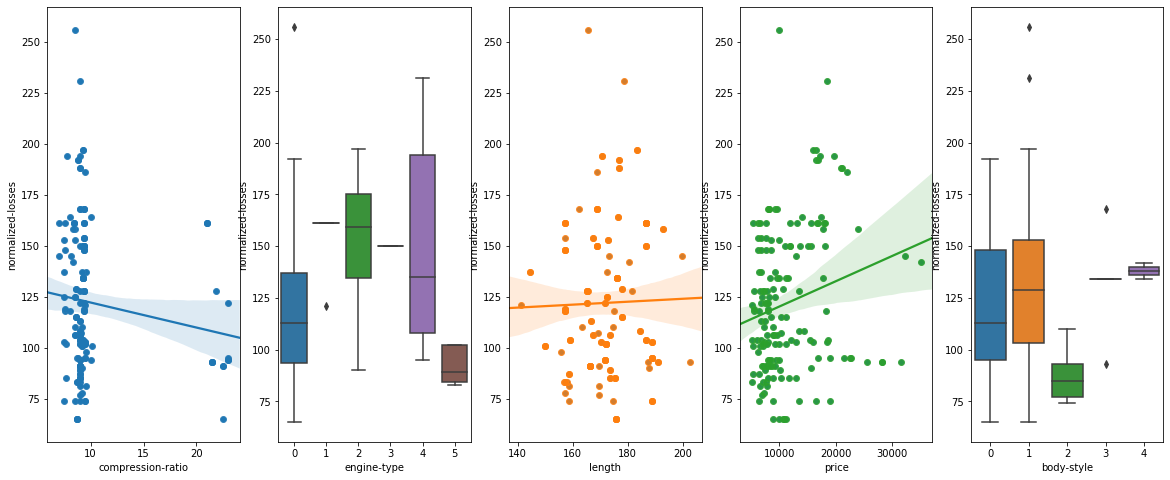

In [29]:
#checking linearty against the target variable

fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(figsize = (20,8), ncols=5, nrows=1, sharey=False)

sns.scatterplot( x = x['compression-ratio'], y = y,  ax=ax1)
## Putting a regression line. 
sns.regplot(x = x['compression-ratio'], y = y, ax=ax1)

sns.boxplot( x = x['engine-type'], y = y,  ax=ax2)
## Putting a regression line. 
#sns.regplot(x = x['engine-type'], y = y, ax=ax2)

sns.scatterplot( x = x['length'], y = y,  ax=ax3)
## Putting a regression line. 
sns.regplot(x = x['length'], y = y, ax=ax3)

sns.scatterplot( x = x['price'], y = y,  ax=ax4)
## Putting a regression line. 
sns.regplot(x = x['price'], y = y, ax=ax4)

sns.boxplot( x = x['body-style'], y = y,  ax=ax5)
## Putting a regression line. 
#sns.regplot(x = x['body-style'], y = y, ax=ax5)

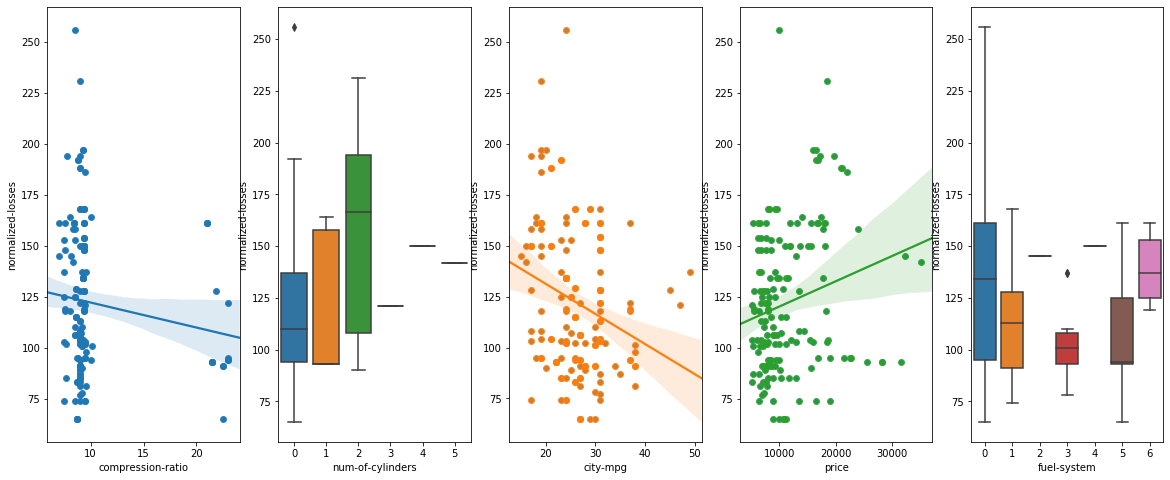

In [30]:
#checking linearty against the target variable

fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(figsize = (20,8), ncols=5, nrows=1, sharey=False)

sns.scatterplot( x = x['compression-ratio'], y = y,  ax=ax1)
## Putting a regression line. 
sns.regplot(x = x['compression-ratio'], y = y, ax=ax1)

sns.boxplot( x = x['num-of-cylinders'], y = y,  ax=ax2)
## Putting a regression line. 
#sns.regplot(x = x['engine-type'], y = y, ax=ax2)

sns.scatterplot( x = x['city-mpg'], y = y,  ax=ax3)
## Putting a regression line. 
sns.regplot(x = x['city-mpg'], y = y, ax=ax3)

sns.scatterplot( x = x['price'], y = y,  ax=ax4)
## Putting a regression line. 
sns.regplot(x = x['price'], y = y, ax=ax4)

sns.boxplot( x = x['fuel-system'], y = y,  ax=ax5)
## Putting a regression line. 
#sns.regplot(x = x['body-style'], y = y, ax=ax5)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler

robust = RobustScaler()
scaler = MinMaxScaler()
scale = StandardScaler()

Skewness of pirce -0.03411755569626988


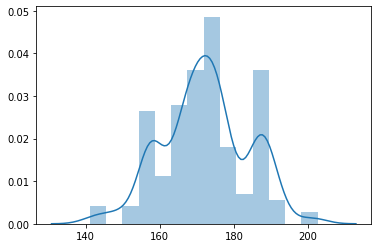

In [32]:
nolog1 = x["length"].to_numpy().reshape(-1,1)
sns.distplot(nolog1);
print("Skewness of pirce",x["length"].skew())

Skewness of pirce 1.5932720067276733


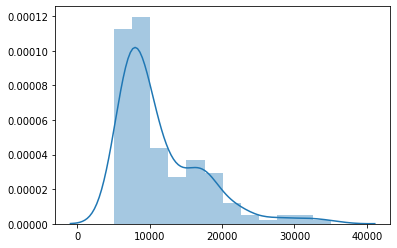

In [33]:
nolog1 = x["price"].to_numpy().reshape(-1,1)
sns.distplot(nolog1);
print("Skewness of pirce",x["price"].skew())

Skewness before Log 0.7659764175950632


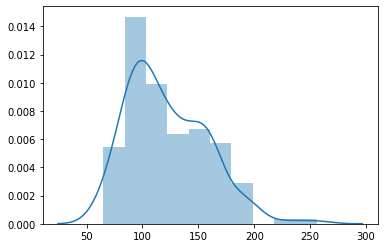

In [34]:
nolog = x["normalized-losses"].to_numpy().reshape(-1,1)
sns.distplot(nolog);
print("Skewness before Log",x["normalized-losses"].skew())

<function matplotlib.pyplot.show(*args, **kw)>

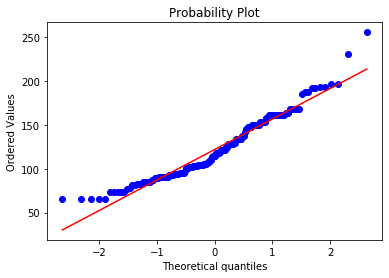

In [35]:
stats.probplot(x["normalized-losses"], plot=plt)
plt.show
#By drawing QQ plot and see whether the points lie on the straight line to figure out whether it is normally distributed

In [36]:
#x["normalized-losses"] = np.log1p(x["normalized-losses"])
#x["normalized-losses"] = np.log(x["normalized-losses"])
#print("Skewness after Log: ",x["normalized-losses"].skew())
#sns.distplot(x["normalized-losses"]);


#The results show that the target variable is right-skewed, hence not normally distributed.
#By logging the target variable, I will get more normally distributed values which is important for regression problem.
#However, since my main model is GBM and XGBoost which do not necessraily assume that the target variable is normally distributed
#so I will not log the target variable for this time.
#When I logged the target variable the change in the results were very minor while GBM and XGBoost performed
#slightly worse.

In [37]:
#stats.probplot(x["normalized-losses"], plot=plt)
#plt.show

In [38]:
x.corr().iloc[0]

normalized-losses    1.000000
make                -0.303962
fuel-type           -0.116736
aspiration          -0.007797
num-of-doors         0.410034
body-style          -0.056131
drive-wheels         0.318665
engine-location           NaN
wheel-base          -0.074362
length               0.023220
width                0.105073
height              -0.432335
curb-weight          0.119893
engine-type          0.022537
num-of-cylinders     0.269736
engine-size          0.167365
fuel-system         -0.111744
bore                -0.036167
stroke               0.065627
compression-ratio   -0.132654
horsepower           0.295772
peak-rpm             0.264597
city-mpg            -0.258502
highway-mpg         -0.210768
price                0.203254
Name: normalized-losses, dtype: float64

In [39]:
#Dropping engine-location, since all rows have 'front' value and the correlation is NaN.
#Hence, this feature is not useful for my model.

x = x.drop('engine-location',axis=1)

In [40]:
x

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,164,0,0,0,0.0,0,0,99.8,176.6,66.2,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950
4,164,0,0,0,0.0,0,1,99.4,176.6,66.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450
6,158,0,0,0,0.0,0,0,105.8,192.7,71.4,...,136,0,3.19,3.40,8.5,110,5500,19,25,17710
8,158,0,0,1,0.0,0,0,105.8,192.7,71.4,...,131,0,3.13,3.40,8.3,140,5500,17,20,23875
10,192,1,0,0,1.0,0,2,101.2,176.8,64.8,...,108,0,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,17,0,0,0.0,0,2,109.1,188.8,68.9,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845
201,95,17,0,1,0.0,0,2,109.1,188.8,68.8,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045
202,95,17,0,0,0.0,0,2,109.1,188.8,68.9,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485
203,95,17,1,1,0.0,0,2,109.1,188.8,68.9,...,145,5,3.01,3.40,23.0,106,4800,26,27,22470


In [41]:
#As i saied earlier on, I will be replacing NaN values with mean and median. However, this is a trade off as replacing
#these NaN values decrease the performances of GBM and XGB but increase the performances of Linear and Ridge regression.
x1 = x
#y = x['normalized-losses']
x1['bore'] = x1['bore'].fillna(x1['bore'].mean())
x1['stroke'] = x1['stroke'].fillna(x1['stroke'].median())

#x1 = x1.drop(['bore','stroke','engine-type','aspiration','compression-ratio','price'],axis=1)
#x1 = x1.dropna(subset=['bore','stroke'], axis=0)
y = x1['normalized-losses']
x1 = x1.drop('normalized-losses',axis=1)
print(x1.isnull().any())

make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool


In [42]:
#Scaling the features
#Many regression algorithms like Ridge and Lasso assume that all features are centered around 0 and have variance in the same
#order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function
#and may train my models incorrectly.
x2 = x1
x1 = scaler.fit_transform(x1)

In [43]:
x1

array([[0.        , 0.        , 0.        , ..., 0.26470588, 0.33333333,
        0.29500969],
       [0.        , 0.        , 0.        , ..., 0.08823529, 0.11111111,
        0.41191796],
       [0.        , 0.        , 0.        , ..., 0.11764706, 0.19444444,
        0.42060258],
       ...,
       [1.        , 0.        , 0.        , ..., 0.08823529, 0.13888889,
        0.54669651],
       [1.        , 1.        , 1.        , ..., 0.32352941, 0.25      ,
        0.57959784],
       [1.        , 0.        , 1.        , ..., 0.11764706, 0.19444444,
        0.5847752 ]])

In [44]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [45]:
#Initially, I tried with linear regression

lin_reg = LinearRegression()
lin_reg.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
#Since there is not enough sample, it is best to use cross validation method rather than trian_test_split.
#If the splits are low, then the accuracy decreases so I had to try several n_splits to find the optimal number.
#Random state must be same for all models for reproducibility.

kf = KFold(n_splits=8, shuffle = True,random_state=20)

In [47]:
#For scoring, I used mse(negative) which gives negative values, so I had to change back to positive at the end.

lin = cross_val_score(lin_reg, x1, y, cv=kf, scoring='neg_mean_squared_error')
lin_mean = lin.mean()
print("The mean mse score of Linear regression: ", abs(lin_mean))

The mean mse score of Linear regression:  697.7146956603896


In [48]:
lin1 = cross_val_score(lin_reg, x1, y, cv=kf, scoring='r2')
print("The mean r2 score for Linear regression: ", lin1.mean())

The mean r2 score for Linear regression:  0.4067219713891874


In [49]:
#Here I tried using Ridge regression which uses l2 regularizer to prevent overfitting.

ridge = Ridge()
ridge.fit(x1,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
#Since the alpha(regularizer parameter) is crucial to tune properly, I used GridSearchCV to get the best parameters
param_grid={'alpha':[0.1,0.2,0.3,0.4,0.6,0.8,1.0]
           }
ridge_grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=kf)

In [99]:
ridge_grid.fit(x1,y)
print('###############################')
print('Final parameters for Ridge: ', ridge_grid.best_params_)   # Best Parametrs
print('Best score for Ridge: ', abs(ridge_grid.best_score_))      # Best score in mse

###############################
Final parameters for Ridge:  {'alpha': 0.2}
Best score for Ridge:  677.3043915961431


C:\Users\edwardkim\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [52]:
best = ridge_grid.best_estimator_
rid_1 = cross_val_score(best, x1, y, cv=kf, scoring='neg_mean_squared_error')
rid_2 = cross_val_score(best, x1, y, cv=kf, scoring='r2')

#MSE and r2 score for ridge
#Shows that there is a slight improvement

print("MSE: ", abs(rid_1.mean()))
print("R2 value: ", rid_2.mean())

MSE:  673.4821541443434
R2 value:  0.4292777676625896


In [53]:
########################################################
#The above results show that there is no need to use ElasticNet or Lasso Regression for this application
#This is because the l1 regularizer from Lasso and ElasticNet drop out weights of many features to 0.
#This causes underfitting, so it is best to use either Linear regression or Ridge regression which uses l2 regularizer.
########################################################

In [54]:
y.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

In [55]:
from sklearn import ensemble

In [56]:
x1

array([[0.        , 0.        , 0.        , ..., 0.26470588, 0.33333333,
        0.29500969],
       [0.        , 0.        , 0.        , ..., 0.08823529, 0.11111111,
        0.41191796],
       [0.        , 0.        , 0.        , ..., 0.11764706, 0.19444444,
        0.42060258],
       ...,
       [1.        , 0.        , 0.        , ..., 0.08823529, 0.13888889,
        0.54669651],
       [1.        , 1.        , 1.        , ..., 0.32352941, 0.25      ,
        0.57959784],
       [1.        , 0.        , 1.        , ..., 0.11764706, 0.19444444,
        0.5847752 ]])

In [57]:
#I used another regression model called gradientboosting which is much more powerful compare to linear regression

reg = ensemble.GradientBoostingRegressor(n_estimators= 1100,max_depth= 2,min_samples_split= 5,learning_rate= 0.01,loss= 'ls')
reg.fit(x1, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=1100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
#Used cross validation method again

gb_reg = cross_val_score(reg, x1, y, cv=kf, scoring ='neg_mean_squared_error')
print(gb_reg)
gb_reg_mean = gb_reg.mean()
print("The mean mse of GBM: ", abs(gb_reg_mean))

[-795.03370293 -177.13280149  -96.76704695 -386.71601827 -273.60069775
 -278.94433774 -200.84300128 -136.89473335]
The mean mse of GBM:  293.24154247025393


In [59]:
param_grid={'max_depth':[3,4,5],'min_samples_split':[4,5,6],
                 'n_estimators':[900,1000,1100],
                 'learning_rate':[0.01],
                 'loss': ['ls']
           }
gcv_gbm=GridSearchCV(reg, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=7)

In [60]:
gcv_gbm.fit(x1,y)
print('Final parameters for GBM: ', gcv_gbm.best_params_)   # Best Parametrs
print('###############################')
print('Best score for GBM: ', abs(gcv_gbm.best_score_))      # Best score in mse

#Much lower mse score is achieved by using Gradient Boosting machine compare to linear regression.
#However, lower mse score can be achieved by dropping the NaN values for stroke and bore without filling them in.

C:\Users\edwardkim\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Final parameters for GBM:  {'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 1100}
###############################
Best score for GBM:  245.07334601560217


In [61]:
best = gcv_gbm.best_estimator_
gbm_mse = cross_val_score(best, x1, y, cv=kf, scoring='neg_mean_squared_error')
gbm_1 = cross_val_score(best, x1, y, cv=kf, scoring='r2')
print("The mean of r2 score for GBM: ", gbm_1.mean())

The mean of r2 score for GBM:  0.7956595965216164


In [62]:
#I also adopted another model called XGB which is similar to GBM but known to be more powerful and less likely to overfit
#due to regularizer. Since there were too many parameters for tuning, I used GridSearchCV to select the best parameters.

xgb1 = XGBRegressor()
#booster= 'gbtree', n_estimators=1200,max_depth= 3,learning_rate= 0.01,objective = 'reg:linear',eval_metric='mae',n_jobs = 7,min_child_weight=0.2
param_grid={'booster' :['dart'],
                 'silent':[True],
                 'max_depth':[3,5],
                 'colsample_bytree':[0.8,0.85,0.9],
                 'n_estimators':[1000, 1100],
                 'objective':['reg:linear'],
                 'eta':[0.01,0.05]}
gcv_xgb=GridSearchCV(xgb1, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=7,refit=True, 
                       return_train_score=True)

In [63]:
gcv_xgb.fit(x1,y,eval_metric='mae')
print('Final parameters for XGB: ', gcv_xgb.best_params_) 
print('###############################')
print('Best score for XGB: ', abs(gcv_xgb.best_score_))

C:\Users\edwardkim\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[06:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[06:34:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
Final parameters for XGB:  {'booster': 'dart', 'colsample_bytree': 0.9, 'eta': 0.05, 'max_depth': 3, 'n_estimators': 1100, 'objective': 'reg:linear', 'silent': True}
###############################
Best score for XGB:  249.10821205999912


In [64]:
xgb1.fit(x1,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [65]:
best_model = gcv_xgb.best_estimator_
xgb_mse = abs(cross_val_score(best_model, x1, y, cv=kf, scoring ='neg_mean_squared_error').mean())
print("The mean of mse for XGB is: ",xgb_mse)

[06:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[06:34:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:34:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[06:34:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[06:34:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\

In [66]:
xgb_1 = cross_val_score(gcv_xgb.best_estimator_, x1, y, cv=kf, scoring='r2')
print("The mean of r2 score for xgb: ",xgb_1.mean())

[06:34:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[06:34:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:34:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[06:34:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[06:34:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\

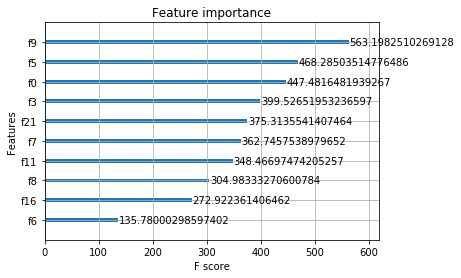

In [67]:
#best_model.get_score(importance_type='gain')
#best_model.get_booster().get_score(importance_type='weight')
plot_importance(best_model, max_num_features=10,importance_type='gain') # top 10 most important features
#plt.show()

In [68]:
x2.columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [69]:
#As XGB and GBM are not linear, the r^2 scores are not very significant.
#However, I could increase the r^2 value of linear regression models upto 0.6 by dropping some features which do not have
#linearity against the target and have low correlation.

print("#####################################################")
print("r_2 score for xgb: {}, gbm: {}, ridge: {}, lin_Reg: {}".format(xgb_1.mean(),gbm_1.mean(), rid_2.mean(),lin1.mean()))
print("MSE score for xgb: {}, gbm: {}, ridge: {}, lin_Reg: {}".format(xgb_mse.mean(),abs(gbm_mse.mean()),abs(rid_1.mean()),abs(lin_mean)))
print("#####################################################")

#####################################################
r_2 score for xgb: 0.7871986811068301, gbm: 0.7956595965216164, ridge: 0.4292777676625896, lin_Reg: 0.4067219713891874
MSE score for xgb: 248.1779342617835, gbm: 243.65352813245107, ridge: 673.4821541443434, lin_Reg: 697.7146956603896
#####################################################


In [70]:
print("XGradient Boost train accuracy: ",xgb1.score(x1,y))
print("Gradient Boost train accuracy: ",reg.score(x1,y))
print("Ridge Regression train accuracy: ",ridge.score(x1,y))
print("Linear Regression train accuracy: ",lin_reg.score(x1,y))

XGradient Boost train accuracy:  0.9999999703847223
Gradient Boost train accuracy:  0.9533484262158656
Ridge Regression train accuracy:  0.5427966785806069
Linear Regression train accuracy:  0.6048162116006516


<BarContainer object of 4 artists>

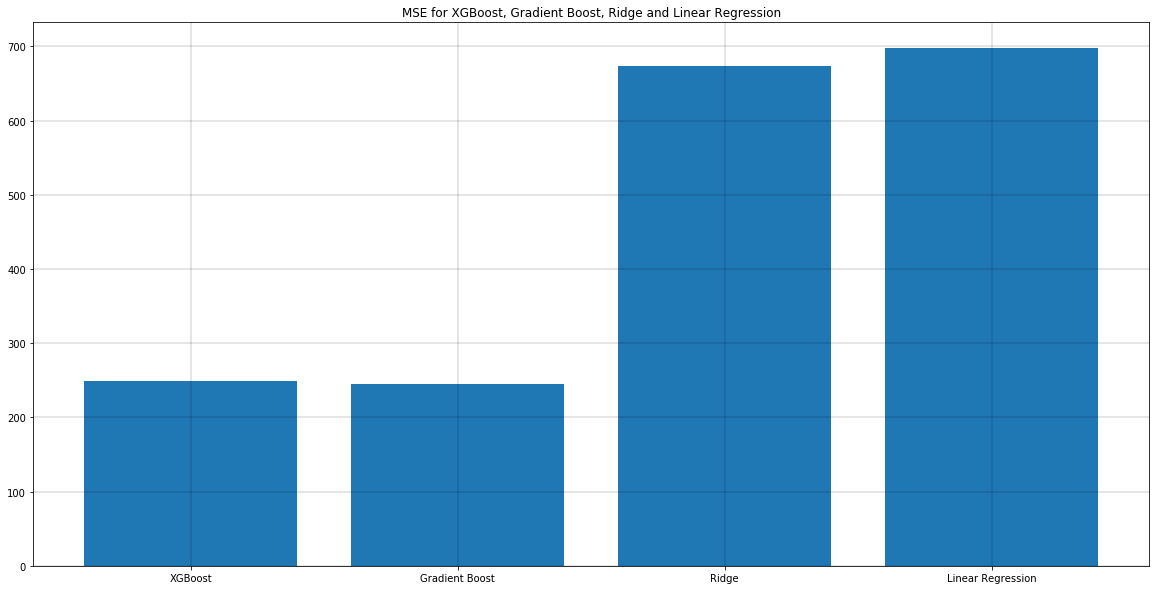

In [71]:
#Then, I plotted bar charts to show mse for each model. The results show that GBM performed the best.
#I expected XGBoost to perform better than GBM, but maybe this could be due to parameter tuning.

plt.figure(figsize = (20,10))
lst = [abs(gcv_xgb.best_score_), abs(gcv_gbm.best_score_), abs(rid_1.mean()),abs(lin_mean)]
lst1= ['XGBoost', 'Gradient Boost', 'Ridge','Linear Regression']

plt.title('MSE for XGBoost, Gradient Boost, Ridge and Linear Regression')
plt.grid(which='major', linestyle='-', linewidth='0.2', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.bar(lst1,lst)


In [72]:
#def ratio_error(x):
#    x = np.power(x,0.5)
#    x = np.exp(x)
#    return x
#lst = [abs(gcv_xgb.best_score_), abs(gcv_gbm.best_score_), abs(rid_1.mean()), abs(ela.mean()),abs(lin_mean)]
#lst = ratio_error(lst)

#print(lst)

In [73]:
#plt.figure(figsize = (20,10))
#lst = [abs(gcv_xgb.best_score_), abs(gcv_gbm.best_score_), abs(rid_1.mean()), abs(ela.mean()),abs(lin_mean)]
#lst1= ['XGBoost', 'Gradient Boost', 'Ridge', 'Elastic Net', 'Linear Regression']

#plt.title('Mean error ratio for XGBoost, Gradient Boost, Ridge, Elastic Net and Linear Regression')
#plt.grid(which='major', linestyle='-', linewidth='0.2', color='black')
#plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
#plt.bar(lst1,lst)


In [74]:
y.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: normalized-losses, dtype: float64

In [75]:
#Conclusion:
#Gradient Boost -> XGBoost -> Ridge -> Linear Regression -> Elastic Net
#I want to mention that linear regression and Ridge regression improved slightly after I normalized the target variable.
#However, I prioritized imporving GBM and XGBoosting, so I did not logged the target.
#Furthermore, when I dropped some features that do not follow linearity and have low correlation, linear and ridge regression
#tended to improve, but this dropped the performances of GBM and XGBoost. 
#Therefore, if I wanted to maximize Linear or Ridge regression for this application, I would have dropped some features which 
#do not obey the linear regression assumptions and also normalize features.


#Future Work: 
#-Could have used One-hot Encoding instead of labelling which could increase the performances
#-With more data samples, the models will be more accurate
#-Parameter tuning for XGBoost

In [76]:
#End#

In [77]:
########################################################################
#Extra (The work below is not much meaningful since the test size is very small)

#I still did this even though the results are not significant to prove how I would have done if I had enough size of 
#train/test data. For this assignment, cross validation is much more valid approach. 
########################################################################

In [78]:
x_train, x_val, y_train, y_val = train_test_split(x1, y, test_size=0.1, random_state=42)

In [79]:
y_val

171    134
151     87
167    134
77     161
125    186
39      85
198    103
69      93
137    104
182    122
29     145
112    161
25     148
91     128
34     101
40      85
168    134
Name: normalized-losses, dtype: int64

In [80]:
ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [81]:
#a =[[ 1.01218308e+00, -3.17287158e-01, -4.53742606e-01,
#         1.17337615e+00,  3.32914962e-01,  1.46836442e+00,
#         4.62283593e-02,  3.48027400e-01,  6.36104902e-04,
#        -7.59329730e-01,  5.39919653e-01, -4.97215812e-01,
#        -3.89687329e-01,  9.10418959e-01, -7.60658165e-01,
#        -2.16219442e-01,  6.52885310e-01, -7.06711992e-01,
#        -3.67370902e-01, -2.84482714e-01,  1.42559610e-02],
#       [ 1.01218308e+00, -3.17287158e-01, -4.53742606e-01,
#         1.17337615e+00,  3.32914962e-01, -7.20833445e-01,
#        -4.82710078e-01, -1.18935699e+00, -1.04257593e+00,
#         3.10516281e-01, -8.83112817e-01, -4.97215812e-01,
#        -3.89687329e-01, -8.42716570e-01, -1.80435193e-01,
#        -2.94659174e-01, -1.12836925e+00, -7.06711992e-01,
#         7.66343601e-01,  9.47336827e-01, -8.86402080e-01]]
#pre = ridge.predict(a)
#pre

In [82]:
pred1 = ridge.predict(x_val)

In [83]:
mse1 = mean_squared_error(y_val, pred1)
print("The mean squared error (MSE) on test set for Ridge: {:.4f}".format(mse1))

The mean squared error (MSE) on test set for Ridge: 647.5750


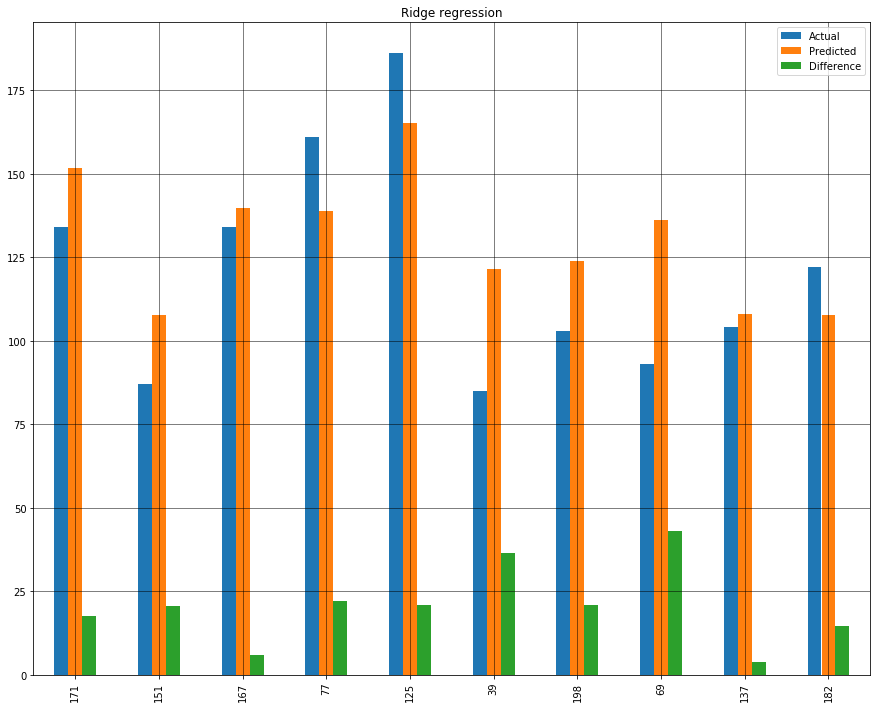

In [84]:
df1 = pd.DataFrame({'Actual': y_val, 'Predicted': pred1, 'Difference': abs(pred1 - y_val)})
df1 = df1.head(10)
df1.plot(kind='bar',figsize=(15,12))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Ridge regression")
plt.show()

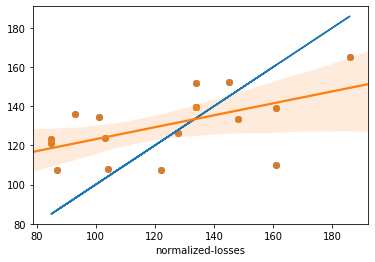

In [85]:
plt.scatter(y_val, pred1)
plt.plot(y_val,y_val)
sns.regplot(x = y_val, y = pred1)

In [86]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
pred = lin_reg.predict(x_val)

In [88]:
mse1 = mean_squared_error(y_val, pred)
print("The mean squared error (MSE) on test set for Linear regression: {:.4f}".format(mse1))

The mean squared error (MSE) on test set for Linear regression: 676.7344


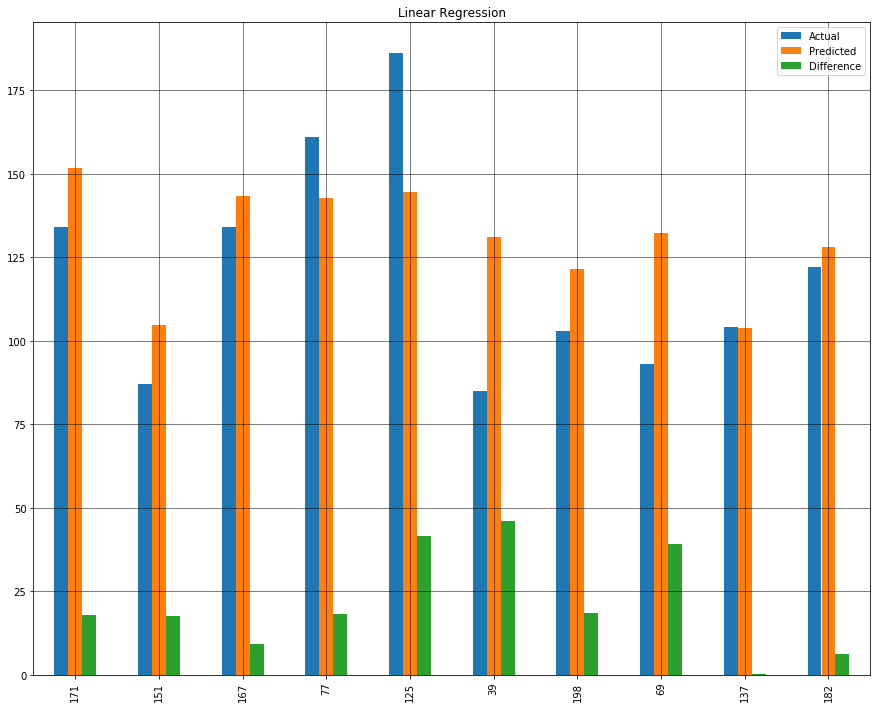

In [89]:

df1 = pd.DataFrame({'Actual': y_val, 'Predicted': pred, 'Difference': abs(pred - y_val)})
df1 = df1.head(10)
df1.plot(kind='bar',figsize=(15,12))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Linear Regression")
plt.show()

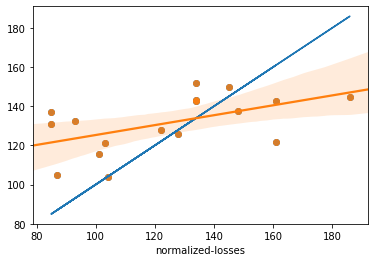

In [90]:
plt.scatter(y_val, pred)
plt.plot(y_val,y_val)
sns.regplot(x = y_val, y = pred)

In [91]:
reg = ensemble.GradientBoostingRegressor(n_estimators= 1100,max_depth= 2,min_samples_split= 5,learning_rate= 0.01,loss= 'ls')
reg.fit(x_train, y_train)

pred2 = reg.predict(x_val)
mse2 = mean_squared_error(y_val, pred2)
print("The mean squared error (MSE) on test set for GBM: {:.4f}".format(mse2))

The mean squared error (MSE) on test set for GBM: 65.1055


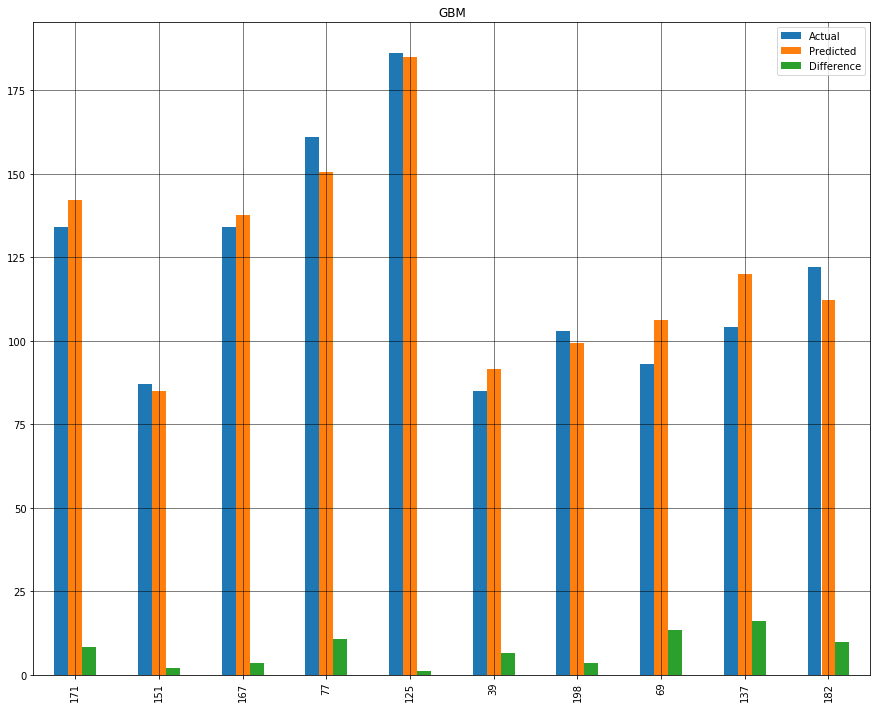

In [92]:
df2 = pd.DataFrame({'Actual': y_val, 'Predicted': pred2, 'Difference': abs(pred2 - y_val)})
df2 = df2.head(10)
df2.plot(kind='bar',figsize=(15,12))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("GBM")
plt.show()

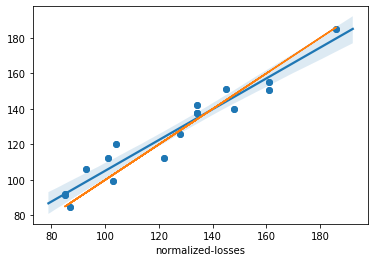

In [93]:
plt.scatter(y_val, pred2)
sns.regplot(x = y_val, y = pred2)
plt.plot(y_val,y_val)


In [94]:
xgb_1 = XGBRegressor(booster= 'dart', n_estimators=1100,max_depth= 3,eta= 0.05, objective = 'reg:squarederror',n_jobs = 7)
xgb_1.fit(x_train,y_train)
pred3 = xgb_1.predict(x_val)
mse3 = mean_squared_error(y_val, pred3)
print("The mean squared error (MSE) on test set for XGB: {:.4f}".format(mse3))

The mean squared error (MSE) on test set for XGB: 60.4245


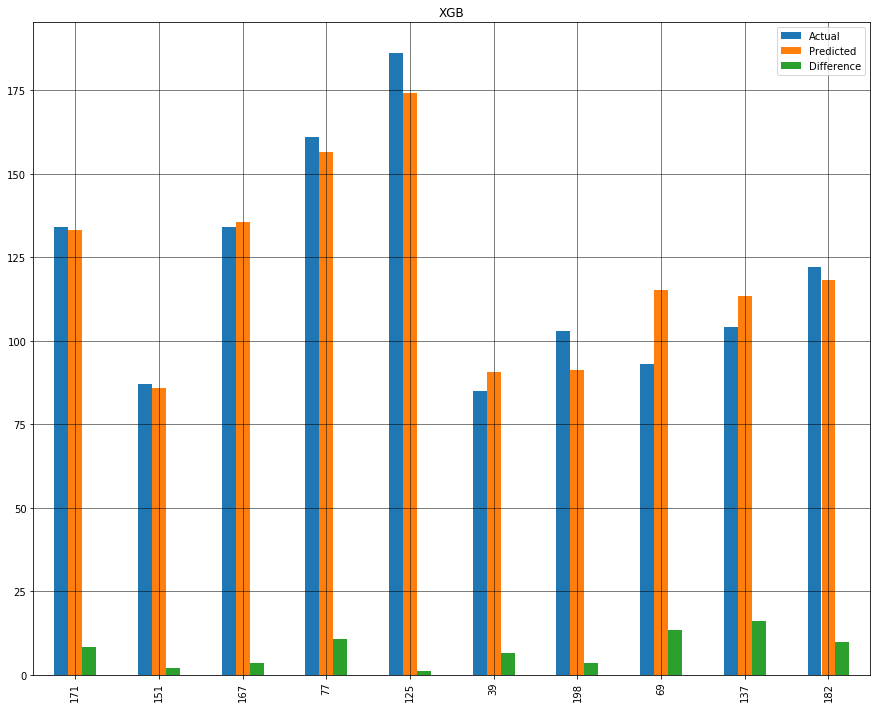

In [95]:
df2 = pd.DataFrame({'Actual': y_val, 'Predicted': pred3, 'Difference': abs(pred2 - y_val)})
df2 = df2.head(10)
df2.plot(kind='bar',figsize=(15,12))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("XGB")
plt.show()

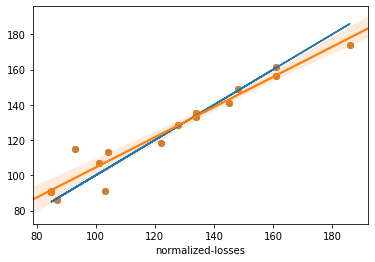

In [96]:
plt.scatter(y_val, pred3)
plt.plot(y_val,y_val)
sns.regplot(x = y_val, y = pred3)

In [97]:
print("The mean squared error (MSE) on test set for XGB: {:.4f}".format(mse3))
print("The mean squared error (MSE) on test set for GBM: {:.4f}".format(mse2))
print("The mean squared error (MSE) on test set for Ridge: {:.4f}".format(mse1))
print("The mean squared error (MSE) on test set for Linear regression: {:.4f}".format(mse1))

#As there are only 15 test data, the results are not significant. 

The mean squared error (MSE) on test set for XGB: 60.4245
The mean squared error (MSE) on test set for GBM: 65.1055
The mean squared error (MSE) on test set for Ridge: 676.7344
The mean squared error (MSE) on test set for Linear regression: 676.7344


In [98]:
#This is the end of my project.
#Thank you.